# Trabalho final de Mineração de dados 
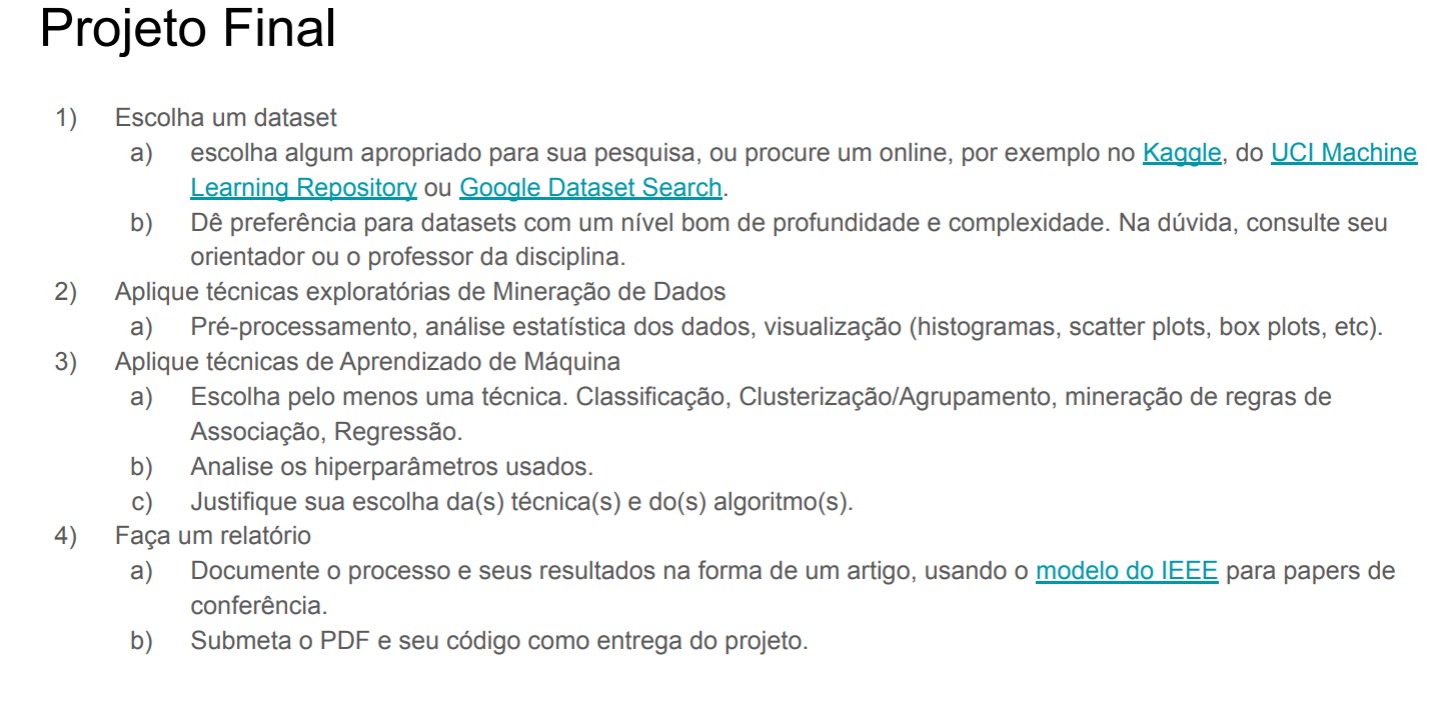


In [2]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


## Plano de ação para fazer o projeto 
### Pré-processamento dos dados e seleção das variáveis mais relevantes
Nesta etapa, os dados brutos serão tratados (remoção de nulos, normalização, encoding, etc.), e serão aplicadas técnicas de seleção de variáveis (como correlação, análise de importância, PCA, etc.) para identificar os atributos mais influentes no modelo.
### Treinamento de modelos de machine learning para predição dos resultados
Diversos algoritmos de aprendizado supervisionado serão treinados com os dados preparados, visando prever um determinado evento ou valor-alvo. Pode-se usar, por exemplo, Random Forest, XGBoost, SVM, Redes Neurais, etc.
### Avaliação dos modelos e comparação de desempenho
Após o treinamento, os modelos serão avaliados com métricas adequadas (como acurácia, F1-score, RMSE, etc.). Essa etapa permite comparar o desempenho dos diferentes algoritmos utilizados e selecionar o mais eficaz para a tarefa proposta.
### Bônus -  Aplicação de técnicas de XAI para compreensão dos resultados
Como etapa complementar, serão aplicadas técnicas de Explainable AI (como SHAP, LIME, Permutation Importance) para interpretar o comportamento dos modelos treinados, permitindo entender como cada variável influenciou nas decisões e aumentando a confiabilidade do modelo.

### Base de dados se encontra na url a seguir 

https://www.kaggle.com/datasets/pattinson9999/uci-metropt-3-dataset 

In [31]:
import kagglehub
import pandas as pd
from kagglehub import KaggleDatasetAdapter


file_path = "Metro.csv"  # caminho correto do arquivo dentro do dataset

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "pattinson9999/uci-metropt-3-dataset",
    file_path
)
df['failure'] = 0

/tmp/ipykernel_3504/1157959138.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [32]:
df

## Removendo coluna Unnamed,poís ela não faz muito sentido para nós, vamos nos guiar pelo ID 
df = df.drop(columns=['Unnamed: 0'])

In [33]:
df.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses',
       'failure'],
      dtype='object')

## Explicação de cada coluna existente

1. Unnamed: 0
2. timestamp
3. TP2 - A medida da pressão sobre o compressor
4. TP3 - A medida da pressão gerada no painel pneumático
5. H1 - A medida da pressão gerada devido à queda de pressão quando ocorre a descarga do filtro separador ciclônico
6. DV_pressure - A medida da queda de pressão gerada quando as torres descarregam secadores de ar; uma leitura zero indica que o compressor está operando sob carga
7. Reservoirs - A medida da pressão a jusante dos reservatórios, que deve estar próxima da pressão do painel pneumático (TP3
8. Oil_temperature - A medida da temperatura do óleo no compressor
9. Motor_current - A medida da corrente de uma fase do motor trifásico; apresenta valores próximos a 0A - quando desliga, 4A - ao trabalhar descarregado, 7A - quando trabalha sob carga e 9A - quando começa a funcionar.
10. COMP - O sinal elétrico da válvula de admissão de ar no compressor; ele está ativo quando não há entrada de ar, indicando que o compressor é desligado ou operando em estado descarregado.
11. DV_eletric - O sinal elétrico que controla a válvula de saída do compressor; é ativo quando o compressor está funcionando sob carga e inativo quando o compressor está desligado ou operando em um estado descarregado.
12. Towers - O sinal elétrico que define a torre responsável pela secagem do ar e a torre responsável por drenar a umidade removida do ar; quando não ativa, indica que a torre está funcionando; quando ativa, indica que a torre dois está em operação.
13. MPG - O sinal elétrico responsável por iniciar o compressor sob carga ativa, ativando a válvula de admissão quando a pressão na unidade de produção de ar (APU) cai abaixo de 8,2 bar; ativa o sensor COMP, que assume o mesmo comportamento que o sensor MPG.
14. LPS - O sinal elétrico que detecta e ativa quando a pressão cai abaixo de 7 barras
15. Pressure_switch - O sinal elétrico que detecta a descarga nas torres de ar-secar.
16. Oil_level - O sinal elétrico que detecta o nível de óleo no compressor; ele está ativo quando o óleo está abaixo dos valores esperados.
17. Caudal_impulses - O sinal elétrico que conta a potência de pulso gerada pela quantidade absoluta de ar que flui da APU para os reservatórios.

In [34]:
df.dtypes

timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
failure              int64
dtype: object

## Analisando a base e fazendo uma pré analise
### A base possui 17 colunas e 1516948 linhas, contendo varios dados
Os dados contios na base de dados são dos seguintes tipos 
Unnamed: 0           int64
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64

De acordo com a documentação dos dados, vamos analisar as filhas dos trens de acordo com o tempo parado, esse calculo foi feito pelo proprio altor dos dados 

regras para analisar a data 

A coluna timestamp é convertida para o formato de data e hora, e a coluna failure recebe o valor 1 sempre que o registro ocorrer dentro de um dos seguintes intervalos de tempo:

18 de abril de 2020, entre 00:00 e 23:59

De 29 de maio de 2020 às 23:30 até 30 de maio de 2020 às 06:00

De 5 de junho de 2020 às 10:00 até 7 de junho de 2020 às 14:30

15 de julho de 2020, entre 14:30 e 19:00

In [35]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
start_timestamp_1 = pd.to_datetime('2020-04-18 00:00:00')
end_timestamp_1 = pd.to_datetime('2020-04-18 23:59:00')
start_timestamp_2 = pd.to_datetime('2020-05-29 23:30:00')
end_timestamp_2= pd.to_datetime('2020-05-30 06:00:00')
start_timestamp_3 = pd.to_datetime('2020-06-05 10:00:00')
end_timestamp_3 = pd.to_datetime('2020-06-07 14:30:00')
start_timestamp_4 = pd.to_datetime('2020-07-15 14:30:00')
end_timestamp_4 = pd.to_datetime('2020-07-15 19:00:00')
j=0
for i in df["timestamp"]:
  if (((i >= start_timestamp_1) and (i <= end_timestamp_1)) or ((i >= start_timestamp_2) and (i <= end_timestamp_2)) or ((i >= start_timestamp_3) and (i <= end_timestamp_3)) or ((i >= start_timestamp_4) and (i <= end_timestamp_4))):
    df.at[j, 'failure'] = 1
  j+=1

In [36]:
## Verificando se possui dados nulos

print(df.isnull().sum())

## Nenhuma das colunas possuem dados nulos 

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
failure            0
dtype: int64


In [37]:
## Com o timestamp correto e a coluna failure existente, vamos começar o processamento 
df

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516944,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516945,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516946,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [38]:
result_df = df[df['failure'] == 1]
result_df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,failure
562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


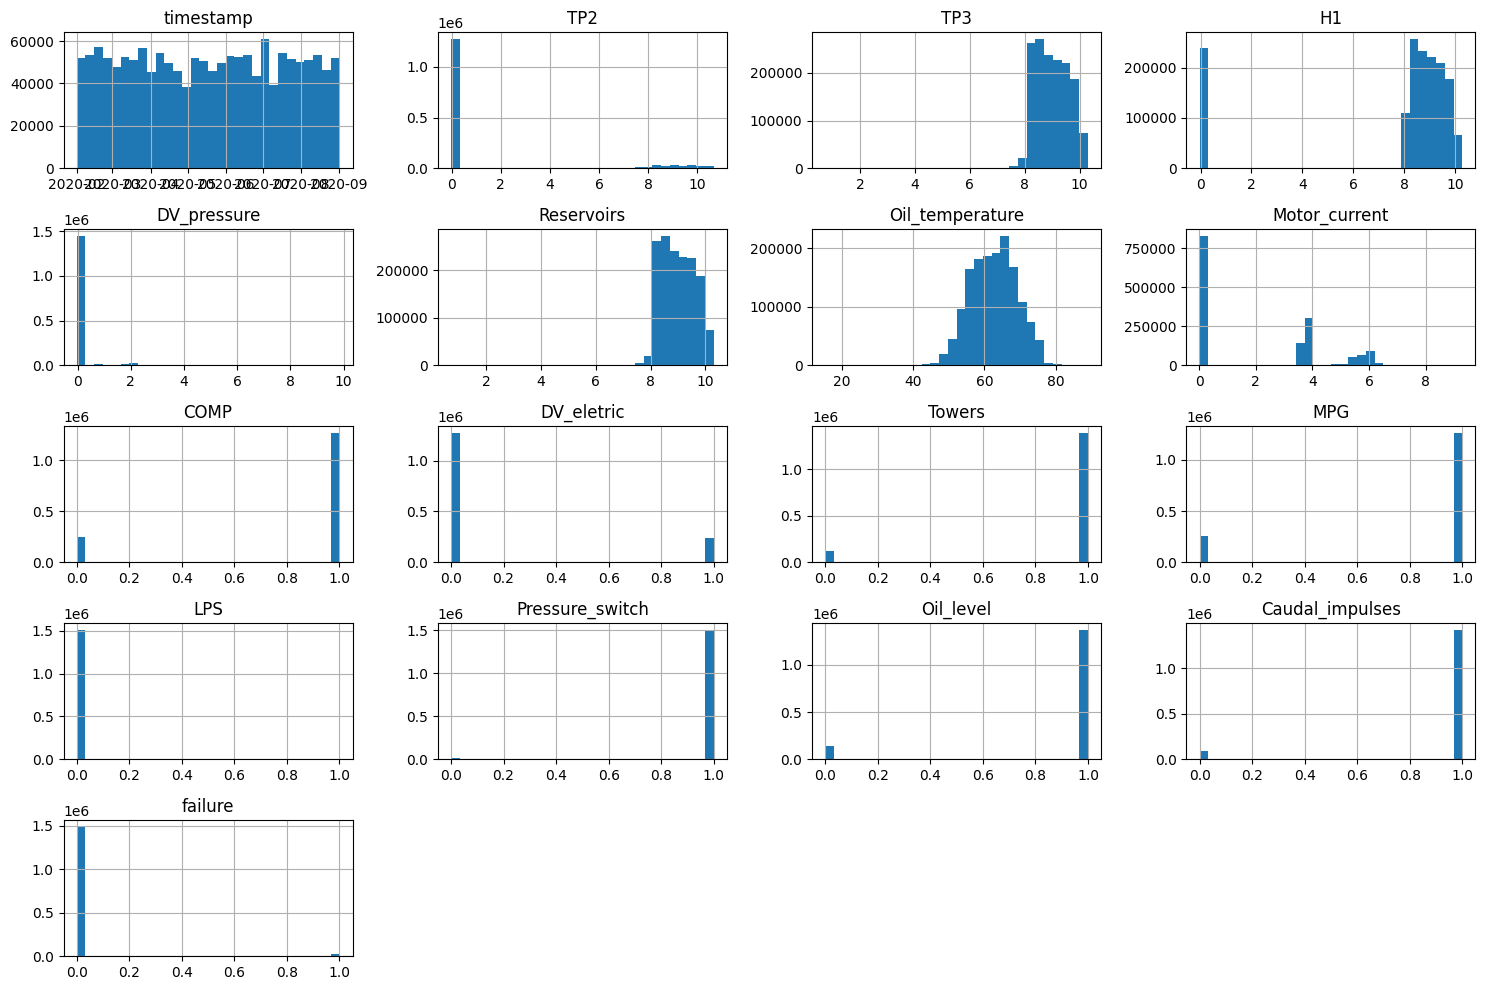

In [39]:
## Pré processamento para identifação das melhores variaveis utilizando algumas tecnicas 
# A utilização do histograma é para verificar a normalização da base 
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

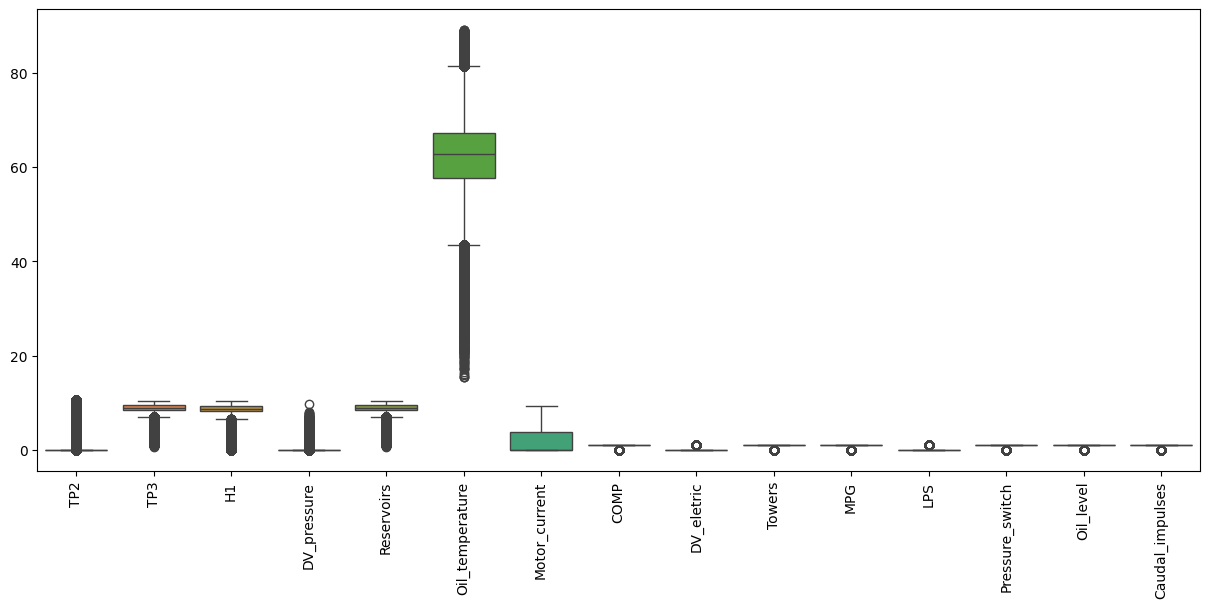

In [40]:
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include='float'))
plt.xticks(rotation=90)
plt.show()

## Explicando a variação do seaborn verificando os valores que possuem uma grande variação 
# As colunas com uma grande variação de valores são Oil_temperature, Motor_current

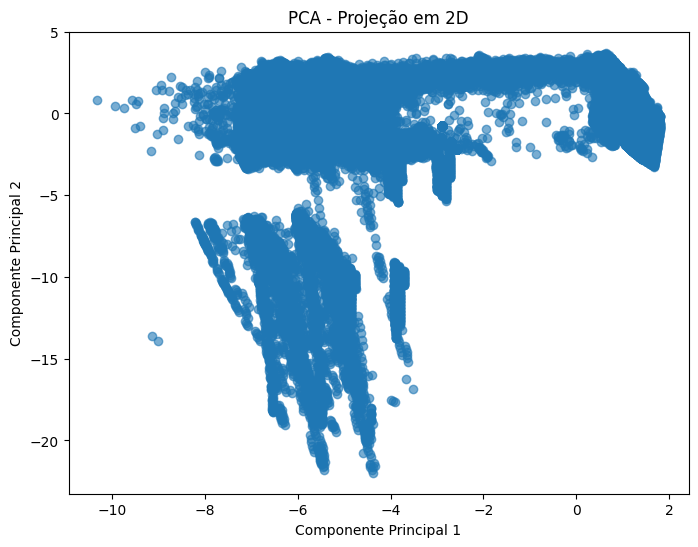

In [41]:
## Utilização do PCA (Análise de Componentes Principais)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

float_data = df.select_dtypes(include='float')
X_scaled = StandardScaler().fit_transform(float_data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Projeção em 2D')
plt.show()

# Utilizamos a técnica de PCA para reduzir as 17 variáveis numéricas a duas componentes principais, 
# que representam as direções que mais explicam a variabilidade dos dados.
# O gráfico mostra que os dados não estão uniformemente distribuídos, mas organizados em faixas, 
# sugerindo padrões ou agrupamentos que podem estar relacionados a diferentes estados operacionais do sistema.
# Essa visualização é útil para investigar anomalias, clusters ou períodos específicos no tempo.

